In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
aapl = pd.read_csv("DATA/apple_2010.csv",index_col='Date',parse_dates=True)
amzn = pd.read_csv("DATA/amazon_2010.csv",index_col='Date',parse_dates=True)
ge = pd.read_csv("DATA/GE_2010.csv",index_col='Date',parse_dates=True)
vix = pd.read_csv("DATA/VIX_2010.csv",index_col='Date',parse_dates=True)
sp500 = pd.read_csv("DATA/sp500_2010.csv",index_col='Date',parse_dates=True)

In [11]:
def compute_cumulative(df, get_absolute=True):
    
    initial_price = df['Adj Close'].iloc[0]
    final_price = df['Adj Close'].iloc[-1]
    
    if get_absolute:
        return final_price - initial_price
    else:
        return 100* (final_price - initial_price) / initial_price
    
    # Absolute --> $ Amount
    # Normalized (% Gain)
    
    

In [12]:
compute_cumulative(aapl)

147.8379945755005

In [13]:
compute_cumulative(aapl, get_absolute=False)

2287.802548057404

In [14]:
def create_cumulative_abs(df):
    df['Cumulative Absolute'] = df['Adj Close'] - df['Adj Close'].iloc[0]
    
    return df

In [15]:
aapl = create_cumulative_abs(aapl)

In [16]:
aapl

,Open,High,Low,Close,Adj Close,Volume,Cumulative Absolute
Date,,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.462008,352410800,0.000000
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,0.100582
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,0.111927
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,0.007360
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,-0.004601
...,...,...,...,...,...,...,...
2021-08-30,149.000000,153.490005,148.610001,153.119995,153.119995,90956700,146.657987
2021-08-31,152.660004,152.800003,151.289993,151.830002,151.830002,86453100,145.367993
2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700,146.047986


In [17]:
amzn = create_cumulative_abs(amzn)

In [18]:
ge = create_cumulative_abs(ge)

In [19]:
sp500 = create_cumulative_abs(sp500)

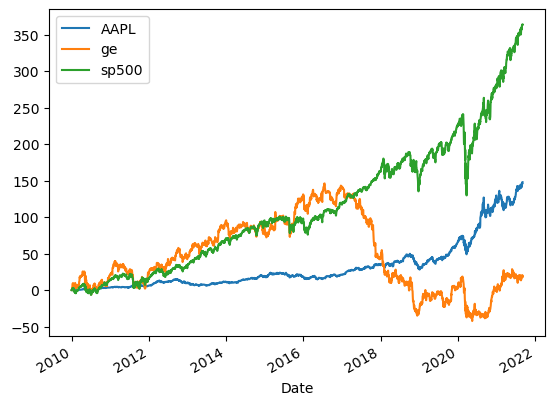

In [24]:
aapl['Cumulative Absolute'].plot(label = 'AAPL')
ge['Cumulative Absolute'].plot(label = 'ge')
sp500['Cumulative Absolute'].plot(label = 'sp500')

plt.legend()

In [30]:
def calculate_cum_perc(df):
    df['Percent Change'] = 100 * (df['Adj Close'] - df['Adj Close'].iloc[0]) / df['Adj Close'].iloc[0]
    
    return df

In [31]:
aapl = calculate_cum_perc(aapl)
amzn = calculate_cum_perc(amzn)
ge = calculate_cum_perc(ge)
sp500 = calculate_cum_perc(sp500)

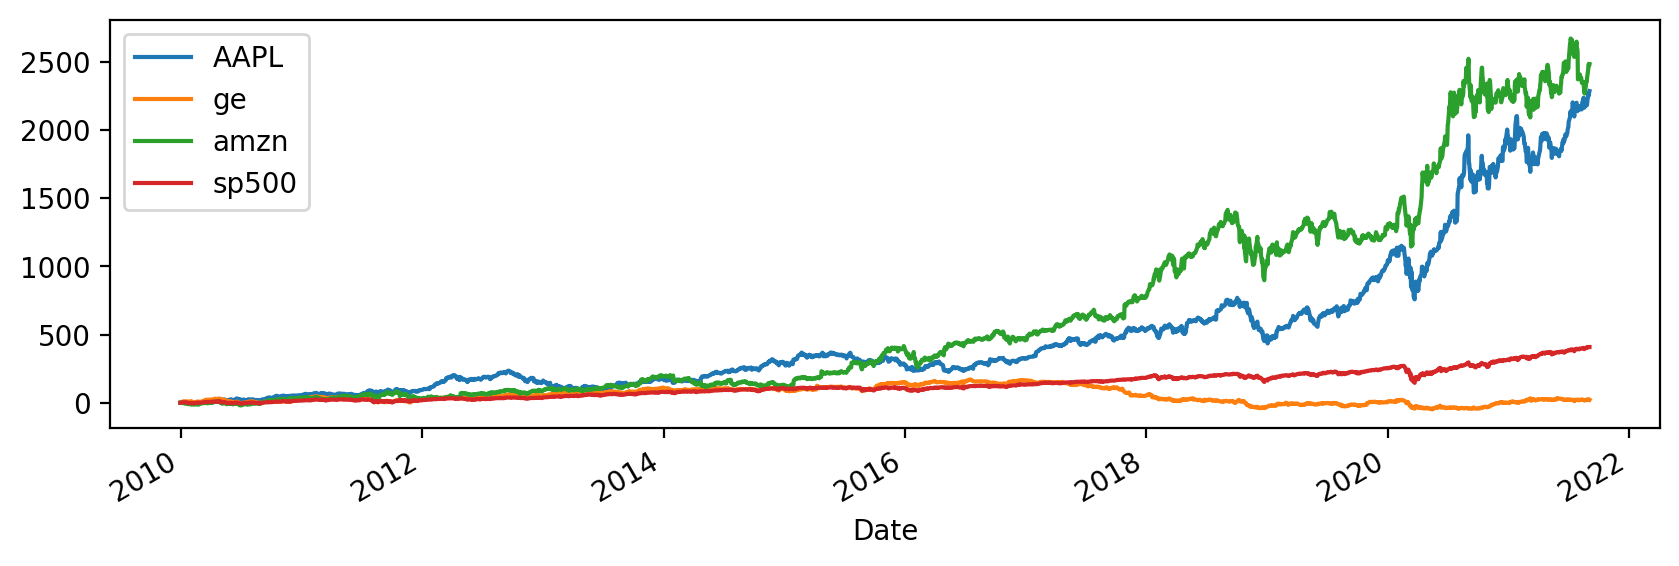

In [33]:
plt.figure(figsize= (10,3), dpi=200)

aapl['Percent Change'].plot(label = 'AAPL')
ge['Percent Change'].plot(label = 'ge')
amzn['Percent Change'].plot(label = 'amzn')
sp500['Percent Change'].plot(label = 'sp500')

plt.legend()

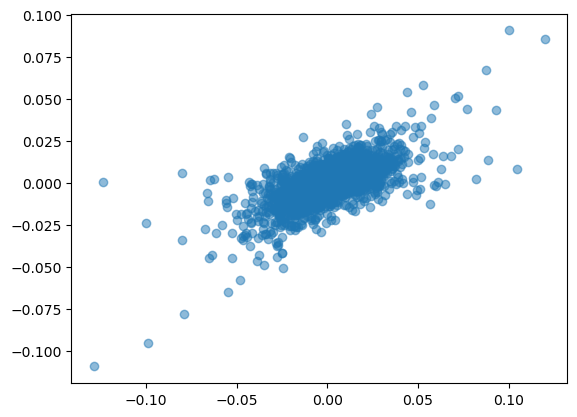

In [35]:
aapl['Daily Returns'] = aapl['Adj Close'].pct_change(1)
sp500['Daily Returns'] = sp500['Adj Close'].pct_change(1)

plt.scatter(aapl['Daily Returns'], sp500['Daily Returns'], alpha=0.5)

In [36]:
from scipy.stats import linregress


In [37]:
amzn['Daily Returns'] = amzn['Adj Close'].pct_change(1)

In [38]:
ge['Daily Returns'] = ge['Adj Close'].pct_change(1)

In [40]:
vix['Daily Returns'] = vix['Adj Close'].pct_change(1)

### Capital Asset Pricing Model using scipy.stats
"The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks.

In [46]:
def beta_and_alpha(df):
    
    beta,alpha,_,_,_ = linregress(sp500['Daily Returns'], df['Daily Returns'])
    
    return beta,alpha

In [50]:
beta_and_alpha(vix)

(-5.899407949811443, 0.006742981581293556)

In [51]:
sp_lev_ETF = pd.read_csv("DATA/sp_leveraged_2010.csv",index_col='Date',parse_dates=True)


In [52]:
sp_lev_ETF = calculate_cum_perc(sp_lev_ETF)

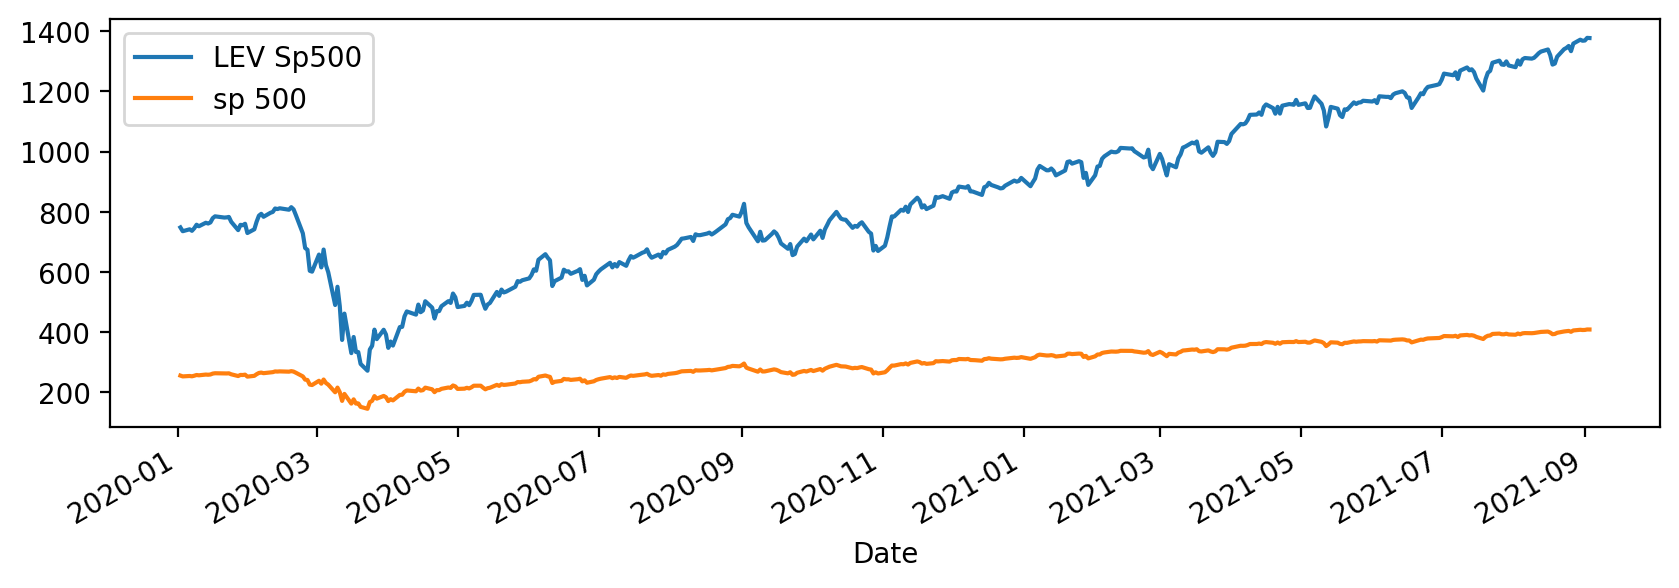

In [59]:
plt.figure(figsize=(10,3), dpi=200)
sp_lev_ETF['Percent Change']['2020':'2021'].plot(label='LEV Sp500')
sp500['Percent Change']['2020':'2021'].plot(label='sp 500')
plt.legend()

In [60]:
sp_lev_ETF['Daily Returns'] = sp_lev_ETF['Adj Close'].pct_change(1)

In [61]:
sp_lev_ETF = sp_lev_ETF.dropna()

In [62]:
beta_and_alpha(sp_lev_ETF)

(2.0101356182990884, -7.749523800499236e-05)

**According to the chart's data, the analysis suggests that leveraged ETFs pose a higher level of risk compared to ETFs.**